In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.metrics import log_loss, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
df = pd.read_csv("/content/drive/MyDrive/pet_adoption_data (1).csv")

การกระจายตัวของคลาสเป้าหมาย:
AdoptionLikelihood
0    1348
1     659
Name: count, dtype: int64


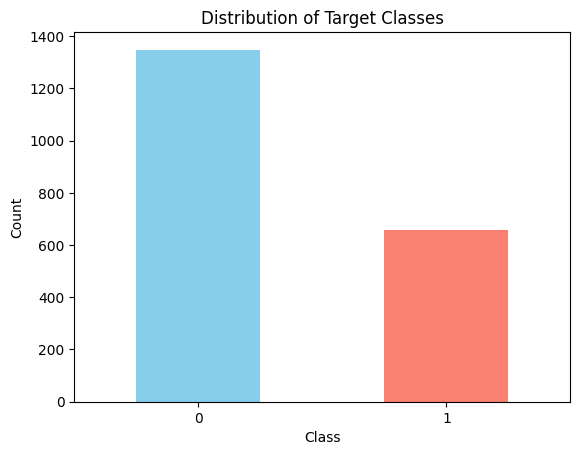

In [9]:
# ตรวจสอบ Target Balance ก่อนเริ่มกระบวนการ
print("การกระจายตัวของคลาสเป้าหมาย:")
print(df['AdoptionLikelihood'].value_counts())
df['AdoptionLikelihood'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Target Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [12]:

# เลือก Features (X) และ Target (y)
features = ['PetType','Breed','AgeMonths','Color','Size','WeightKg','Vaccinated','HealthCondition','TimeInShelterDays','AdoptionFee','PreviousOwner']
target = 'AdoptionLikelihood'

In [14]:
# แยกข้อมูล features (X) และ target (y)
# ใช้ .copy() เพื่อหลีกเลี่ยง SettingWithCopyWarning
X = df[features].copy()
y = df[target].copy()

In [15]:
# การเข้ารหัสตัวแปร (Encoding Categorical Variables)
for col in ['PetType', 'Breed', 'Color', 'Size']:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

In [16]:
# แบ่งข้อมูลเป็นชุด train และ test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# จัดการข้อมูลที่ไม่สมดุลด้วย SMOTE
print("\nจำนวนข้อมูลก่อนใช้ SMOTE:", Counter(y_train))
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
print("จำนวนข้อมูลหลังใช้ SMOTE:", Counter(y_train_resampled))


จำนวนข้อมูลก่อนใช้ SMOTE: Counter({0: 1078, 1: 527})
จำนวนข้อมูลหลังใช้ SMOTE: Counter({1: 1078, 0: 1078})


In [26]:
# สร้างโมเดล SVM
model = SVC(C=1.0, kernel='rbf',probability=True)

In [27]:
# ฝึกโมเดลด้วยข้อมูลที่ผ่านการทำ SMOTE แล้ว
print("กำลังฝึกโมเดล SVM ด้วยข้อมูลที่สมดุลแล้ว...")
model.fit(X_train_resampled, y_train_resampled)

กำลังฝึกโมเดล SVM ด้วยข้อมูลที่สมดุลแล้ว...


SVC(probability=True)

In [28]:
# ทดสอบ Overfitting

# Training Set: (Accuracy) บนข้อมูลชุดฝึก
y_train_pred = model.predict(X_train_resampled)
train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
print(f"Accuracy on Training Set: {train_accuracy:.2f}")

# Testing Set: (Accuracy) บนข้อมูลชุดทดสอบ
y_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on Testing Set: {test_accuracy:.2f}")

# Testing Set: เปรียบเทียบผลลัพธ์
# ถ้า Training Accuracy สูงกว่า Testing Accuracy มาก (เช่น 0.98 vs 0.85)
# แสดงว่าโมเดลอาจเกิด Overfitting

Accuracy on Training Set: 0.59
Accuracy on Testing Set: 0.67


In [29]:
# ทดสอบ Loss

# ทำนายค่าความน่าจะเป็น (probability) บนข้อมูลชุดทดสอบ
y_pred_proba = model.predict_proba(X_test)

# คำนวณค่า Log Loss บนข้อมูลชุดทดสอบ
loss = log_loss(y_test, y_pred_proba)

# ทำนายค่าคลาส (class) บนข้อมูลชุดทดสอบ
y_pred = model.predict(X_test)

# คำนวณค่า Accuracy บนข้อมูลชุดทดสอบ
accuracy = accuracy_score(y_test, y_pred)

print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Test Loss: 0.6488
Test Accuracy: 0.6716


In [30]:
# การประเมินโมเดล (Model Evaluation)
# ทำนายผลบนข้อมูลชุดทดสอบ (ใช้ X_test เดิม)
y_pred = model.predict(X_test)

In [31]:
# ประเมินประสิทธิภาพของโมเดล
print("\nการประเมินผลโมเดล:")

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


การประเมินผลโมเดล:
Accuracy: 0.67

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.78      0.76       270
           1       0.50      0.45      0.47       132

    accuracy                           0.67       402
   macro avg       0.62      0.61      0.62       402
weighted avg       0.66      0.67      0.67       402




Confusion Matrix:


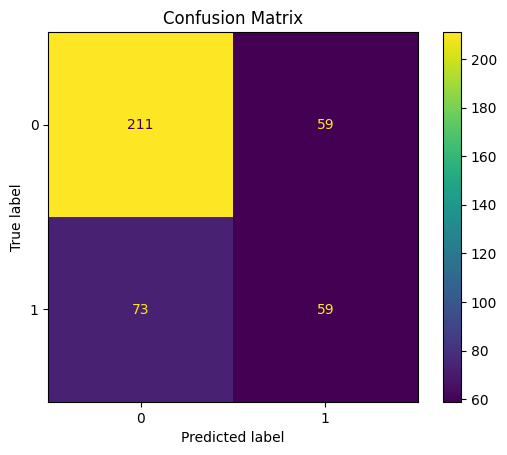

In [32]:
# Confusion Matrix
print("\nConfusion Matrix:")
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
plt.title("Confusion Matrix")
plt.show()